# **1. 프로젝트 주제**

### 다음 분기에 설계해야할 게임에 대한 EDA Project

# **2. 데이터불러오기, Library import**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from scipy.stats import boxcox
from scipy import stats

In [2]:
# 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv('vgames2.csv', index_col=0)         # 파일을 url로도 읽을 수 있으나, 계속되는 작업이기에 다운받아 사용함
df

# 총 데이터 16598행

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# **3. EDA, Data Preprocessing**

In [3]:
# 전처리 전 게임이름 기준의 데이터는 몇 개인가?
df_by_name = df.groupby('Name').NA_Sales.sum()
df_by_name

Name
'98 Koshien                                    0.15
.hack//G.U. Vol.1//Rebirth                        0
.hack//G.U. Vol.2//Reminisce                   0.11
.hack//G.U. Vol.2//Reminisce (jp sales)           0
.hack//G.U. Vol.3//Redemption                     0
                                             ...   
thinkSMART: Chess for Kids                     0.01
uDraw Studio                                   1.67
uDraw Studio: Instant Artist               0.010.08
wwe Smackdown vs. Raw 2006                     1.57
¡Shin Chan Flipa en colores!                      0
Name: NA_Sales, Length: 11493, dtype: object

## 1) 결측치제거

In [4]:
# 각 행별로 N/A값은 공란으로 만든 후
df = df.replace('N/A','')

In [5]:
# 결측치가 몇개인지 파악한 후
pd.isnull(df).sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 16598개의 데이터 갯수에 비하면 적은 수치임을 파악하고 결측치있는 행 제거
df = df.dropna(axis=0)
df

# https://rfriend.tistory.com/263

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 2) Data type 변경

In [7]:
# 데이터 type 파악 후,
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [8]:
# Year 컬럼의 종류 확인 후,
df['Year'].sort_values()

9277        0.0
16395       0.0
14667       0.0
2250        1.0
8682        1.0
          ...  
1787     2016.0
10108    2017.0
5311     2017.0
15234    2017.0
6907     2020.0
Name: Year, Length: 16241, dtype: float64

In [9]:
# df['Year'] 4자릿수로 만들기.
def digit_int_4(number):
    if number in range(0,20):
        return int(number+2000)

    elif number in range(86, 100):
        return int(number+1900)
    
    else:
        return int(number)
    
df['Year']=df['Year'].apply(digit_int_4)

# type 바뀌었나 확인
print(df['Year'].info())
df

<class 'pandas.core.series.Series'>
Int64Index: 16241 entries, 1 to 16598
Series name: Year
Non-Null Count  Dtype
--------------  -----
16241 non-null  int64
dtypes: int64(1)
memory usage: 253.8 KB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 3) Data 내용정리

In [10]:
# 1.Sales 특성정리
# Sales 특성의 데이터에 수치 외적으로 K,M이 있어 얼마나 들어있는지 확인 후,

print(df['NA_Sales'].str.contains('K|M').sum())
print(df['EU_Sales'].str.contains('K|M').sum())
print(df['JP_Sales'].str.contains('K|M').sum())
print(df['Other_Sales'].str.contains('K|M').sum())

191
195
196
197


In [11]:
# 다음과 같이 삭제하려고 했으나
# drop_values = ['K','M']
# df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
# 삭제할 데이터가 약 800개로 많다고 판단하여 아래와 같은 함수를 만들어 데이터를 정리함

In [12]:
# K->1,000, M->1,000,000으로 변환
# K, M 미표기 데이터는
def sales_scale(value):
    if value[-1] == 'K':
        value = value.replace('K','')
        value = float(value)*0.001
        return value
    elif value[-1] == 'M':
        value = value.replace('M','')
        return value
    else:
        return value

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'].apply(sales_scale))
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'].apply(sales_scale))
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'].apply(sales_scale))
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].apply(sales_scale))
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
# 2. Total_Sales 특성생성 (4개로 구분된 지역별 출고량 합산)
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [14]:
# 3. Genre 컬럼 data 확인
set(df.Genre)                #df.columns

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [15]:
# '-' -> '_'로 이름 바꿈
df = df.replace('Role-Playing','Role_playing')

In [16]:
# 잘바뀌었는지 확인
set(df.Genre)

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role_playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [17]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## 4) 이상치제거

In [18]:
# Year컬럼의 분포확인
df['Year'].value_counts(ascending=True)

2020       1
2017       3
1980       8
1984      14
1985      14
1988      15
1990      16
1987      16
1983      17
1989      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     262
1997     289
1999     336
2016     342
2000     348
1998     377
2001     480
2013     545
2014     580
2015     611
2012     652
2004     740
2003     774
2002     826
2005     934
2006    1005
2011    1133
2007    1195
2010    1253
2008    1423
2009    1428
Name: Year, dtype: int64

In [19]:
# 2000년대는 게임의 종류가 더 많은 데이터가 있어야하는데, 2016년 이후의 데이터가 누락됐다 판단하여 2016년 이전의 데이터만 사용.

df = df[df.Year < 2016]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [20]:
# 인덱스 재설정
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15890,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15891,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15892,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15893,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [21]:
# 전처리 후 게임이름 기준의 데이터는 기준 몇개인가?

df_by_name_new = df.groupby('Name').NA_Sales.sum()
df_by_name_new

Name
'98 Koshien                                0.15
.hack//G.U. Vol.1//Rebirth                 0.00
.hack//G.U. Vol.2//Reminisce               0.11
.hack//G.U. Vol.2//Reminisce (jp sales)    0.00
.hack//G.U. Vol.3//Redemption              0.00
                                           ... 
thinkSMART FAMILY!                         0.03
thinkSMART: Chess for Kids                 0.01
uDraw Studio                               1.67
uDraw Studio: Instant Artist               0.09
¡Shin Chan Flipa en colores!               0.00
Name: NA_Sales, Length: 11100, dtype: float64

In [22]:
# 결측치여부재확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

# **4. 시각화**

## 1) 지역별 선호하는 장르별 게임 비율

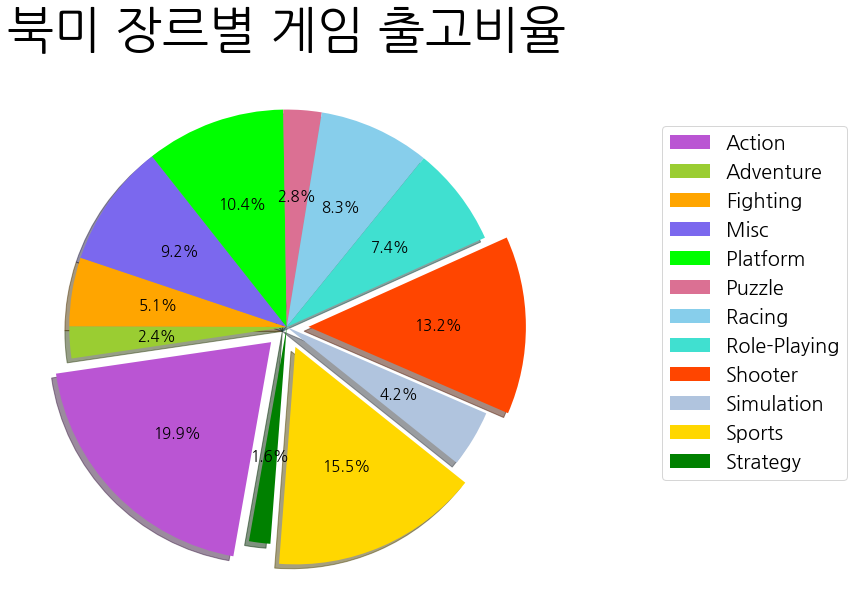

In [23]:
# NA
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']

# https://developer-ankiwoong.tistory.com/229

labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 1. 장르별 북미 출고량
plt.title('북미 장르별 게임 출고비율', size=50, weight='bold')

NA_Sales_by_Genre = df.groupby('Genre').NA_Sales.sum()
ratio_N = NA_Sales_by_Genre

pie = ax.pie(ratio_N, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()
#https://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend

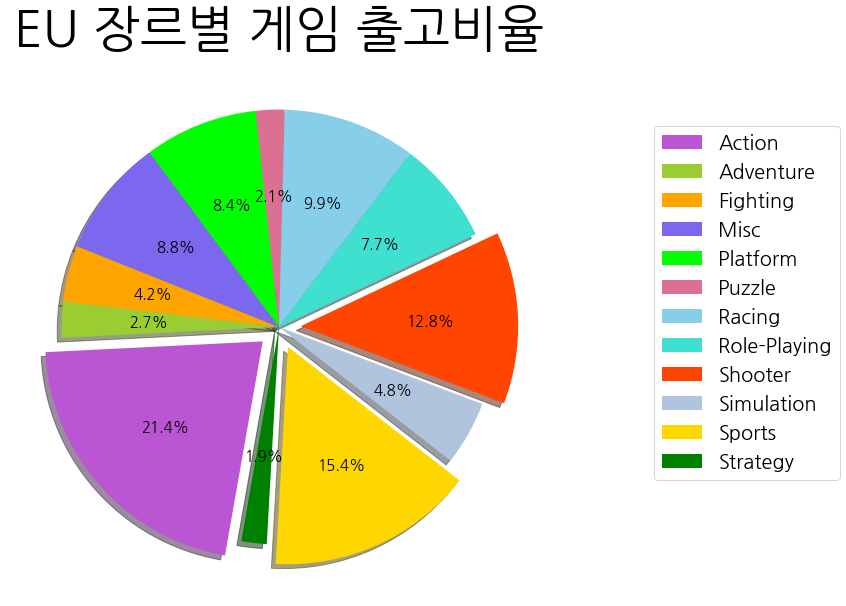

In [24]:
# EU
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']

    
# 2. 장르별 유럽 출고량
plt.title('EU 장르별 게임 출고비율', size=50, weight='bold')

EU_Sales_by_Genre = df.groupby('Genre').EU_Sales.sum()
ratio_E = EU_Sales_by_Genre

pie = ax.pie(ratio_E, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

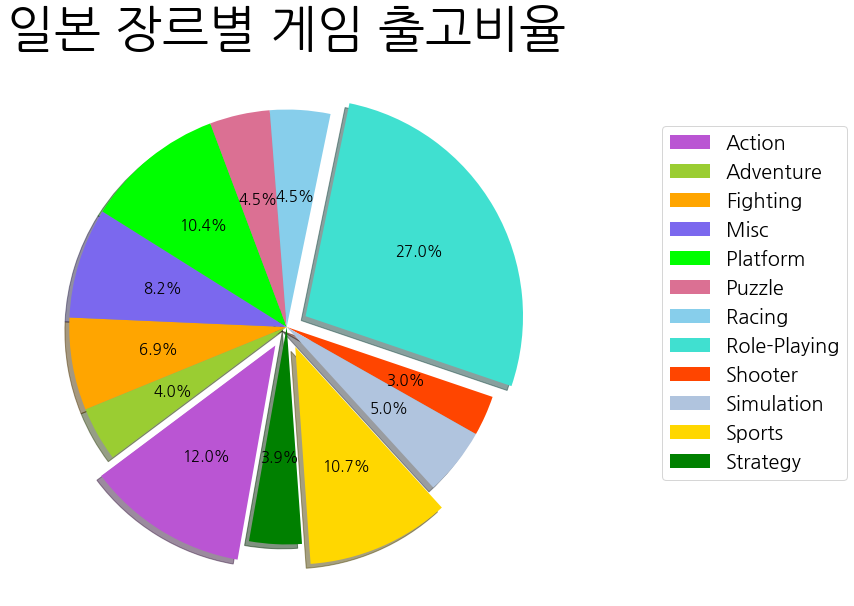

In [25]:
### JAPAN
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 3. 장르별 일본 출고량
plt.title('일본 장르별 게임 출고비율', size=50, weight='bold')

JP_Sales_by_Genre = df.groupby('Genre').JP_Sales.sum()
ratio_J = JP_Sales_by_Genre
explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_J, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

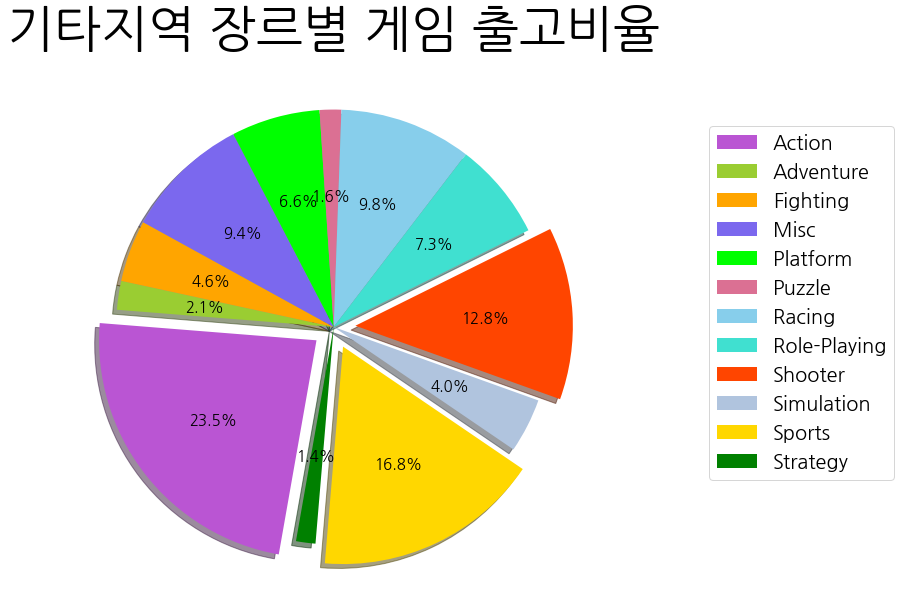

In [26]:
### etc
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 4. 장르별 타지역 출고량
plt.title('기타지역 장르별 게임 출고비율', size=50, weight='bold')

Other_Sales_by_Genre = df.groupby('Genre').Other_Sales.sum()
ratio_O = Other_Sales_by_Genre

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_O, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

## 2) 연도별 게임의 트렌드

In [27]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [28]:
# 연도별 장르별 출고량 구분
Total_Yearly_Genre = df.pivot_table(index='Year',columns='Genre',values='Total_Sales', aggfunc = 'sum')
Total_Yearly_Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.58,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [29]:
# 장르별 데이터 나누기

Action_df = (df[(df['Genre'] == 'Action')])   # (df['Genre'].isin(['Action'])) 와 같음.
Adventure_df = (df[(df['Genre'] == 'Adventure')])
Fighting_df = (df[(df['Genre'] == 'Fighting')])
Misc_df = (df[(df['Genre'] == 'Misc')])
Platform_df = (df[(df['Genre'] == 'Platform')])
Puzzle_df = (df[(df['Genre'] == 'Puzzle')])
Racing_df = (df[(df['Genre'] == 'Racing')])
Role_df = (df[(df['Genre'] == 'Role-Playing')]) # 얘만 가운데 작대기때문에 이름바꿈
Shooter_df = (df[(df['Genre'] == 'Shooter')])
Simulation_df = (df[(df['Genre'] == 'Simulation')])
Sports_df = (df[(df['Genre'] == 'Sports')])
Strategy_df = (df[(df['Genre'] == 'Strategy')])

In [30]:
# 1980년대 장르별 평균 출고량
Total_Yearly_Genre.loc[1980:1989].mean()

Genre
Action           5.110000
Adventure        2.390000
Fighting         2.413333
Misc             1.688000
Platform        13.584444
Puzzle           8.964286
Racing           2.420000
Role_playing     3.812500
Shooter          5.977000
Simulation       0.170000
Sports           3.531111
Strategy              NaN
dtype: float64

In [31]:
# 1990년대 게임 장르별 평균 출고량
Total_Yearly_Genre.loc[1990:1999].mean()

Genre
Action          13.915000
Adventure        4.977778
Fighting        13.723333
Misc             7.047778
Platform        20.887000
Puzzle           3.894000
Racing          14.881000
Role_playing    18.277000
Shooter          7.654444
Simulation       5.204000
Sports          14.647000
Strategy         6.390000
dtype: float64

In [32]:
# 2000년대 장르별 평균 출고량
Total_Yearly_Genre.loc[2000:2010].mean()

Genre
Action          88.239091
Adventure       12.741818
Fighting        22.376364
Misc            51.539091
Platform        37.100909
Puzzle          11.728182
Racing          42.993636
Role_playing    43.887273
Shooter         46.444545
Simulation      26.140000
Sports          81.348182
Strategy         8.512727
dtype: float64

In [33]:
# 2010-2015 장르별 평균 출고량
Total_Yearly_Genre.loc[2010:2015].mean()

Genre
Action          108.291667
Adventure         9.843333
Fighting         12.946667
Misc             38.025000
Platform         19.775000
Puzzle            3.530000
Racing           20.328333
Role_playing     47.416667
Shooter          74.078333
Simulation       11.735000
Sports           51.608333
Strategy          5.855000
dtype: float64

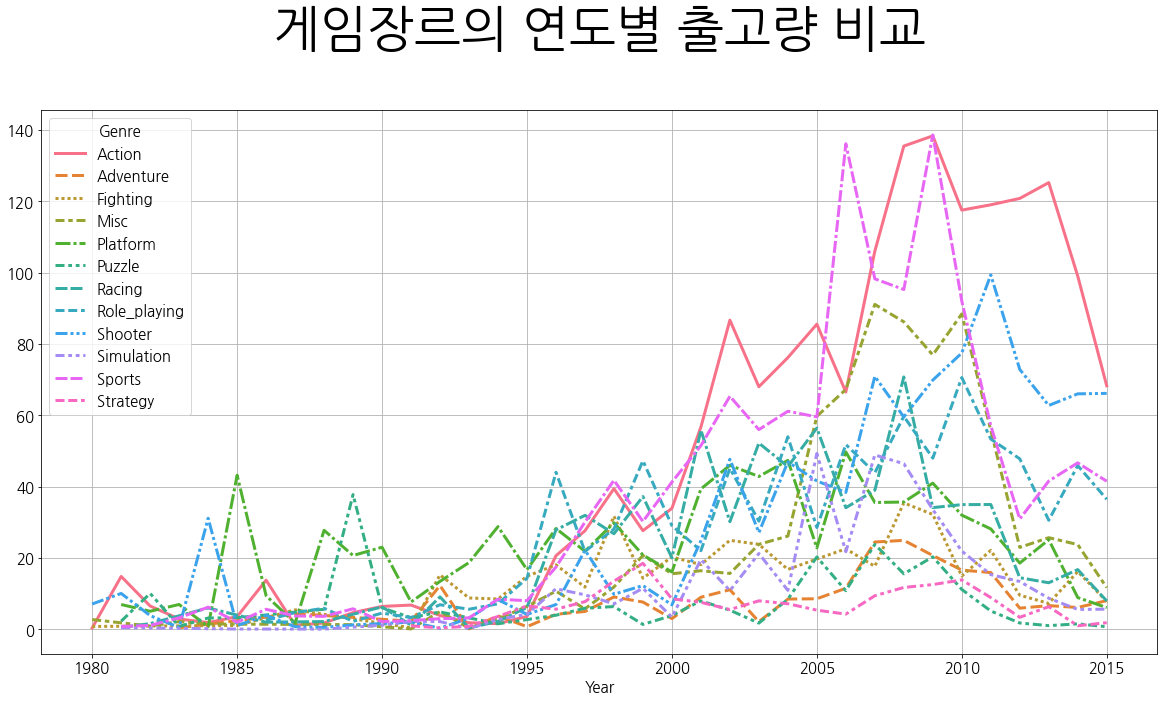

In [34]:
# 폰트설정
plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus=False)

# 캔버스설정
plt.rcParams["figure.figsize"] = (20, 10)   ## 캔버스 사이즈 생성(가로/세로)
plt.rcParams['lines.linewidth'] = 3  # 라인두께
plt.rcParams['axes.grid'] = True # 차트내 격자선(grid) 표시 여부     # 지웟는데 안지워짐 이유는 모르겠움

# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html
# 타이틀
plt.title('게임장르의 연도별 출고량 비교\n', size=50, weight='bold')

# 주어진 그래프 그리기
sns.lineplot(data = Total_Yearly_Genre);

In [35]:
# 그래프를 보면, 액션과 스포츠는 2000년대 급성장을 하고, 플랫폼은 계속 꾸준히 인기있음을 확인.

In [36]:
# 1985년 플랫폼 게임 중 가장 출고량이 높은 것은?
Platform_df[Platform_df['Year'] == 1985]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
73,Wrecking Crew,NES,1985,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51
3080,Balloon Fight,NES,1985,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92
4030,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
13138,Ice Climber,NES,1985,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50


In [37]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2000 = Action_df[(Action_df.Year >= 2000) & (Action_df.Year < 2010)]
Sports_df_2000 = Sports_df[(Sports_df.Year >= 2000) & (Sports_df.Year < 2010)]

### * 2000-2009 가장 인기있던 액션게임 

In [38]:
Action_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14051,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
5117,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9394,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
4608,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
13338,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
15776,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
740,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
1003,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
12986,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
7963,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05


### * 2000-2009 가장 인기있던 스포츠게임 

In [39]:
Sports_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2798,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3223,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3300,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
10452,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
8140,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.05
370,Mario & Sonic at the Olympic Games,DS,2008,Sports,Sega,1.64,2.48,0.44,0.58,5.14
4975,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
7067,Tony Hawk's Pro Skater 2,PS,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
10161,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58
15888,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53


In [40]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2010 = Action_df[(Action_df.Year >= 2010)]
Shooter_df_2010 = Shooter_df[(Shooter_df.Year >= 2010)]
Sports_df_2010 = Sports_df[(Sports_df.Year >= 2010)]

### * 2010-2015 가장 인기있던 스포츠게임 

In [41]:
Sports_df_2010.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2535,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2617,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
14167,Zumba Fitness,Wii,2010,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
12923,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
2962,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
5370,Kinect Sports,X360,2010,Sports,Microsoft Game Studios,3.92,1.78,0.03,0.51,6.24
9783,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
13853,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
7547,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2.93,0.01,0.46,4.32
10406,FIFA 12,X360,2011,Sports,Electronic Arts,0.84,2.79,0.02,0.53,4.18


### * 2010-2015 가장 인기있던 액션게임 5가지

In [42]:
Action_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3346,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10466,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
1930,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8668,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
11374,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82


### * 2010-2015 가장 인기있던 총게임 5가지

In [43]:
Shooter_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2701,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
5989,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
8702,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4069,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6125,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


# 5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [44]:
# 전체 출고량 중 제일 큰 값 찾기(Name기준으로 Total_Sales 구하기(플랫폼마다도 구분이 되서 합하는게 필요함))

df_by_name_3 = df.groupby('Name').Total_Sales.sum()

# MAX Total 값
df_by_name_3_total_value = df.groupby('Name').Total_Sales.sum().max()
print('\n',df_by_name_3_total_value) 


 82.74000000000001


### * 1980년-2015년 총 출고량 가장 높은 게임 10가지

In [45]:
# Total 출고량 높은 순서대로 정렬
The_Best_Sales = df_by_name_3.sort_values(ascending=False)

pd.DataFrame(The_Best_Sales).head(10)

,Total_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Call of Duty: Modern Warfare 3,30.84
New Super Mario Bros.,30.01


In [46]:
# Wii Sports의 정보 -> 퍼블리셔는 닌텐도
df_Wii = (df [df['Name'] == 'Wii Sports'])
df_Wii

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2798,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [47]:
# Wii Sports의 정보 -> 플랫폼종류가 다양하고, 퍼블리셔는 Take-Two Interactive로 동일함
df_Grand = (df [df['Name'] == 'Grand Theft Auto V'])
df_Grand

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1930,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3346,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10391,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
10466,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
15873,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [48]:
# Super Mari Bros의 정보 ->플랫폼종류2개지만 NES가 주되고, 퍼블리셔는 닌텐도로 동일함
df_Super_Mario_Bros = (df [df['Name'] == 'Super Mario Bros.'])
df_Super_Mario_Bros

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4030,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12508,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


In [49]:
# 가장 큰 시장인 미국의 연도별 플랫폼 게임 출고량
df_by_P = df.loc[:,'Name':'NA_Sales']

Total_Yearly_Platform = pd.crosstab(index = df_by_P.Year, columns = df_by_P.Platform, values=df_by_P.NA_Sales, aggfunc = np.sum)
Total_Yearly_Platform 

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,10.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.42,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.69,NaN,NaN,NaN,NaN,0.82,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Total_Yearly_Platform.sum()

Platform
2600     80.32
3DO       0.00
3DS      72.03
DC        5.43
DS      387.66
GB      113.64
GBA     178.26
GC      131.74
GEN      19.27
GG        0.00
N64     138.34
NES     125.94
NG        0.00
PC       91.19
PCFX      0.00
PS      333.79
PS2     568.54
PS3     387.60
PS4      83.94
PSP     106.50
PSV      15.88
SAT       0.72
SCD       1.00
SNES     61.23
TG16      0.00
WS        0.00
Wii     495.10
WiiU     36.83
X360    593.42
XB      179.24
XOne     76.50
dtype: float64

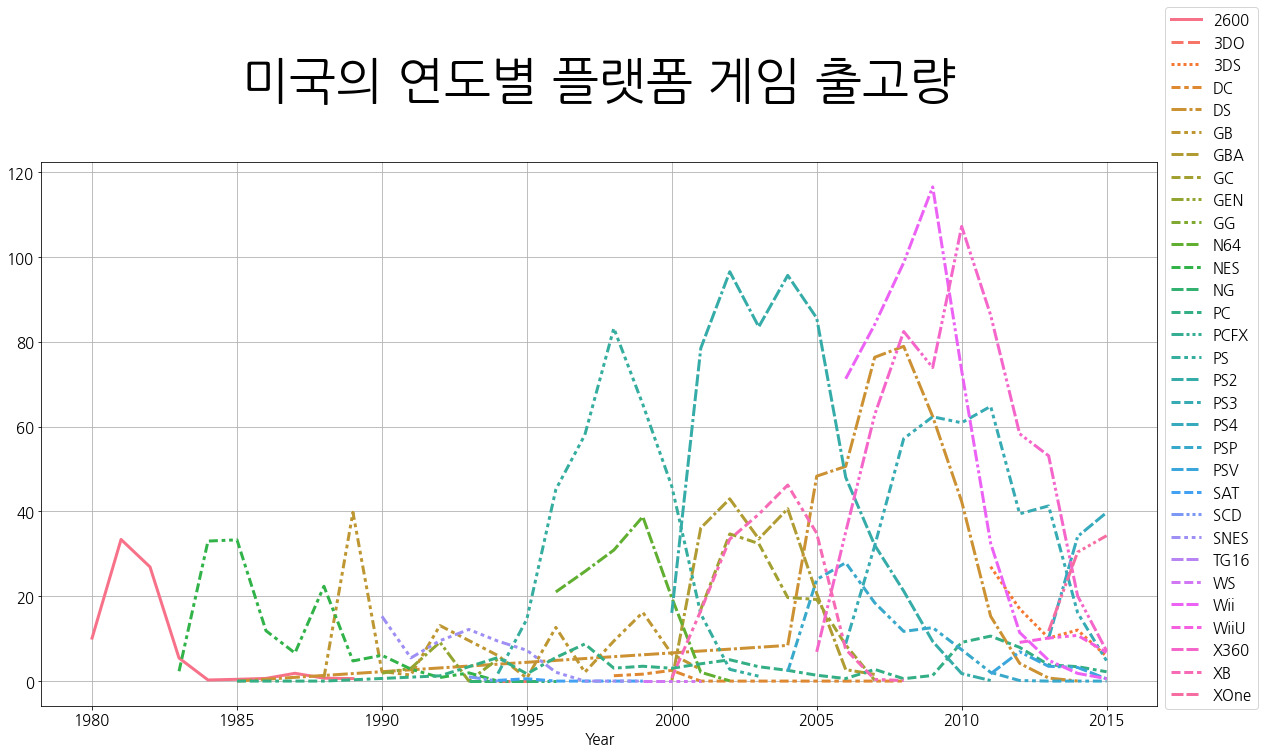

In [51]:
# 미국의 연도별 플랫폼 게임 출고량
plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus=False)

# 캔버스설정
plt.rcParams["figure.figsize"] = (20, 10)   ## 캔버스 사이즈 생성(가로/세로)
plt.rcParams['lines.linewidth'] = 3  # 라인두께
plt.rcParams['axes.grid'] = True # 차트내 격자선(grid) 표시 여부     # 지웟는데 안지워짐 이유는 모르겠움

# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html

# 타이틀
plt.title('미국의 연도별 플랫폼 게임 출고량\n', size=50, weight='bold')


# 주어진 그래프 그리기
sns.lineplot(data = Total_Yearly_Platform)

# 범주

plt.legend(prop={'size': 15}, bbox_to_anchor=(1,1.3));# 범례 표시 # bbox_to_anchor하면 표 밖으로 범례가 나감. 숫자로 위치조정.


# **6. T-test 가설검정**

### Wii와 플레이스테이션3 중 어떤 플랫폼을 사용해야 출고량이 더 높을지에 대한 ttest 가설검정


__귀무가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 높을 것이다.__  
__대립가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.__

In [52]:
# Platform Wii 사용게임 중 닌텐도를 제외한 회사의 출고량
df_Wii_Total_Sales = df[df['Platform'] == 'Wii']
df_Wii_Total_Sales_new = df_Wii_Total_Sales['Total_Sales'][~df['Publisher'].isin(['Nintendo'])]

In [53]:
# Platform PS3 사용게임 중 sony를 제외한 회사의 출고량
df_PS3_Total_Sales = df[df['Platform'] == 'PS3']
df_PS3_Total_Sales_new = df_PS3_Total_Sales['Total_Sales'][~df['Publisher'].isin(['Sony Computer Entertainment', 'Sony Computer Entertainment America', 'Sony Computer Entertainment Europe', 'Sony Music Entertainment', 'Sony Online Entertainment'])]

In [54]:
# 두 sample의 평균이 동일한지 비교
np.mean(df_Wii_Total_Sales_new), np.mean(df_PS3_Total_Sales_new)

(0.4304734219269103, 0.6977316857899382)

In [55]:
# 두 샘플 분포확인

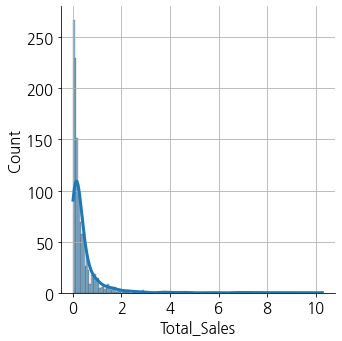

In [56]:
# wiii 분포확인
sns.displot(df_Wii_Total_Sales_new,kde=True);

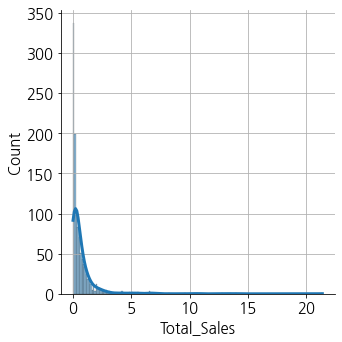

In [57]:
# Ps3 분포확인
sns.displot(df_PS3_Total_Sales_new,kde=True);

In [58]:
# 두 sample을 boxcox로 정규성을 맞춰줌

In [59]:
# Platform Wii 사용게임 중 닌텐도를 제외한 회사의 data
df_Wii_Total_Sales_new2 = df_Wii_Total_Sales[~df['Publisher'].isin(['Nintendo'])]
df_Wii_Total_Sales_new2

/var/folders/07/192hjwjx7jzfdyz0ph3vff080000gn/T/ipykernel_11812/2833493574.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Wii_Total_Sales_new2 = df_Wii_Total_Sales[~df['Publisher'].isin(['Nintendo'])]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
34,G-Force,Wii,2009,Action,Disney Interactive Studios,0.19,0.20,0.00,0.05,0.44
37,Ninja Reflex,Wii,2008,Action,Electronic Arts,0.11,0.01,0.00,0.01,0.13
49,Chaotic: Shadow Warriors,Wii,2009,Action,Activision,0.18,0.00,0.00,0.01,0.19
53,SpongeBob's Boating Bash,Wii,2010,Misc,THQ,0.25,0.07,0.00,0.03,0.35
...,...,...,...,...,...,...,...,...,...,...
15800,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0.00,0.00,0.07,0.00,0.07
15809,NatGeo Challenge! Wild Life,Wii,2010,Misc,Black Bean Games,0.04,0.00,0.00,0.00,0.04
15846,Boom Blox,Wii,2008,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12,1.22
15862,Wall-E,Wii,2008,Platform,THQ,0.51,0.40,0.00,0.11,1.02


In [60]:
# Platform PS2 사용게임 중 sony를 제외한 회사의 data
df_PS3_Total_Sales_new2 = df_PS3_Total_Sales[~df['Publisher'].isin(['Sony Computer Entertainment', 'Sony Computer Entertainment America', 'Sony Computer Entertainment Europe', 'Sony Music Entertainment', 'Sony Online Entertainment'])]
df_PS3_Total_Sales_new2

/var/folders/07/192hjwjx7jzfdyz0ph3vff080000gn/T/ipykernel_11812/2720484991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_PS3_Total_Sales_new2 = df_PS3_Total_Sales[~df['Publisher'].isin(['Sony Computer Entertainment', 'Sony Computer Entertainment America', 'Sony Computer Entertainment Europe', 'Sony Music Entertainment', 'Sony Online Entertainment'])]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
15863,Way of the Samurai 3,PS3,2008,Action,Gamebridge,0.18,0.08,0.22,0.04,0.52
15866,Yakuza,PS3,2012,Action,Sega,0.00,0.00,0.11,0.00,0.11
15885,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
15887,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05


In [61]:
# Wii 데이터 내용확인
df_Wii_Total_Sales_new2['Total_Sales'].sort_values()

13465     0.01
12274     0.01
10519     0.01
11820     0.01
10375     0.01
         ...  
6280      6.91
10839     7.27
8140      8.05
8855      9.52
214      10.27
Name: Total_Sales, Length: 1204, dtype: float64

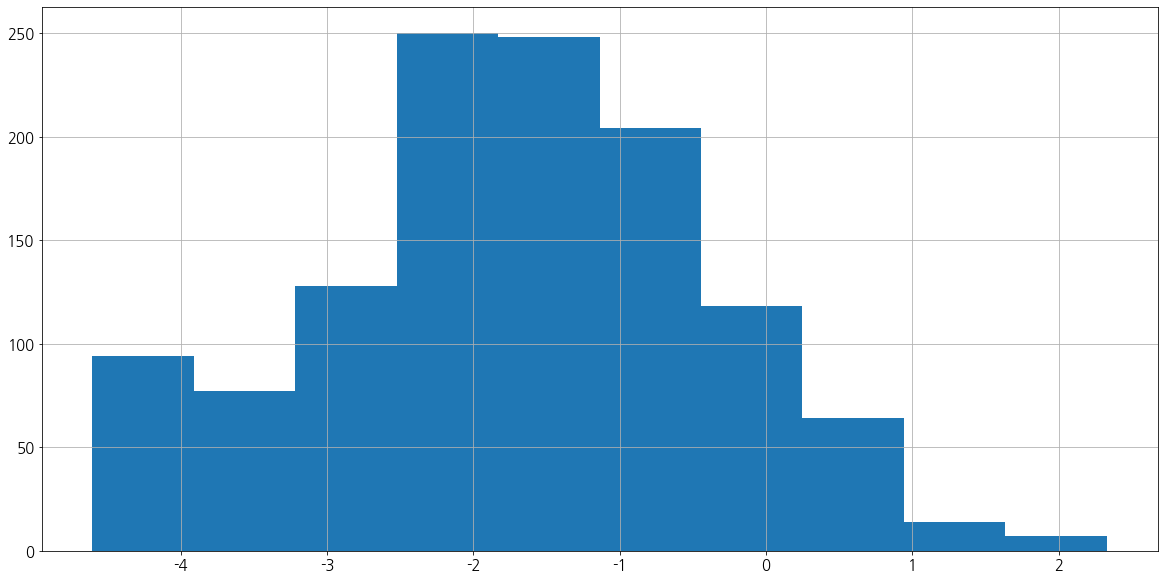

In [62]:
# Wii 분포확인
data_wii = boxcox(df_Wii_Total_Sales_new2['Total_Sales'].to_numpy(), 0)
# histogram
pyplot.hist(data_wii)
pyplot.show()

In [63]:
# PS3 데이터 내용확인
df_PS3_Total_Sales_new2['Total_Sales'].sort_values()

7813      0.01
9710      0.01
9917      0.01
10002     0.01
5366      0.01
         ...  
8035     10.69
9529     12.73
13522    13.47
4069     14.04
3346     21.39
Name: Total_Sales, Length: 1133, dtype: float64

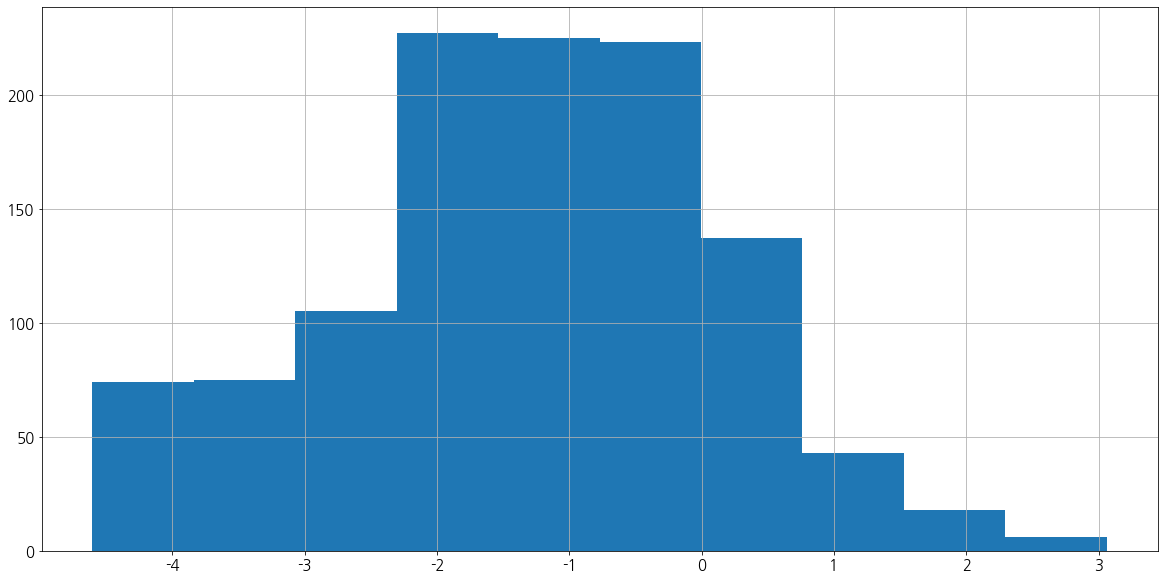

In [65]:
data_ps3 = boxcox(df_PS3_Total_Sales_new2['Total_Sales'].to_numpy(), 0)
# histogram
pyplot.hist(data_ps3)
pyplot.show()

In [66]:
# 두 sample의 평균이 동일한지 비교
np.mean(data_ps3), np.mean(data_wii)

(-1.3042049244568041, -1.665851752074573)

In [69]:
-1.3042049244568041 - -1.665851752074573

0.3616468276177689

In [70]:
# Two-Sample One-tailed test
# 귀무가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 높을 것이다.
# 대립가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.

stats1, pv1 = stats.ttest_ind(data_wii, data_ps3, alternative='less' )
stats2, pv2 = stats.ttest_ind(data_wii, data_ps3, alternative='greater')

alpha = 0.05

if pv1 < alpha:
    ans = 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.'
elif pv2 < alpha:
    ans = 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 높을 것이다.'
else:
    ans = '없음'

pv1, pv2, ans

(9.058870158439833e-11,
 0.9999999999094112,
 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션3를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.')

# 7. 결론 : PS3의 액션게임을 만들어 가장 큰 북미시장에 진출해야함

추가적으로 고려해야할 사항은 2021년 현재 ps5까지 출시된 상황으로, ps 버전별 추가분석이 필요해보임. (해당데이터는 ps5에 대한 내용이 없음)